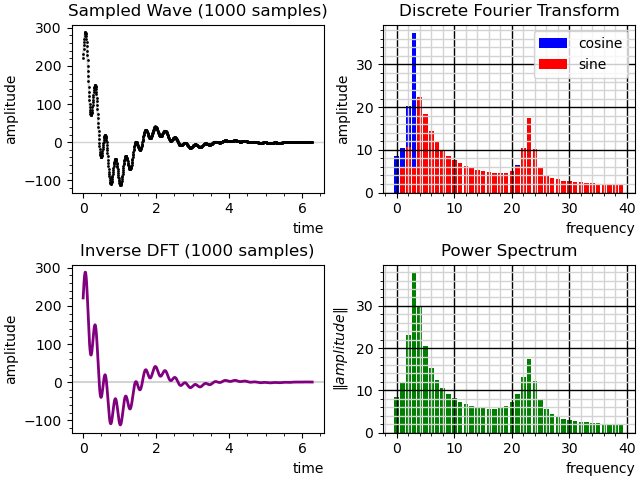

In [1]:
# decay_fft.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

max_freq = 40


def plot_samples(ts, ys, ax):
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    ax.plot(
        ts,
        ys,
        color="lightgray",
        marker="o",
        markerfacecolor="none",
        markersize=1,
        markeredgecolor="black",
    )

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_dft(a_cos, b_sin, ax):
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = max(np.amax(np.nonzero(a_cos)), np.amax(np.nonzero(b_sin))) + 1

    ax.bar(range(0, highest_freq), a_cos[:highest_freq], label="cosine", color="blue")
    ax.bar(range(0, highest_freq), b_sin[:highest_freq], label="sine", color="red")

    ax.legend(loc="best")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_idft(ts, yr, ax):
    ax.set_title(f"Inverse DFT ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray")

    ax.plot(ts, yr, color="purple", linewidth=2)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_powerspec(ps, ax):
    ax.set_title("Power Spectrum")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel(r"$\Vert amplitude \Vert$")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = np.amax(np.nonzero(ps)) + 1

    ax.bar(range(0, highest_freq), ps[:highest_freq], color="green")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def analyze(file_name):
    samples = np.genfromtxt(file_name, delimiter=",")
    ts = samples[:, 0]
    ys = samples[:, 1]

    # Complex array returned by numpy real FFT
    ca = np.fft.rfft(ys)
    a_cos = np.abs(np.real(ca)) / len(ca)
    b_sin = np.abs(np.imag(ca)) / len(ca)

    # Reconstructed y-values (real)
    yr = np.fft.irfft(ca)

    # Don't include samples that are beyond the reconstruction
    ys = ys[: len(yr)]
    ts = ts[: len(yr)]

    # Power spectrum is magnitude of complex FFT values
    ps = np.abs(ca) / len(ca)

    plt.close("all")
    fig = plt.figure(file_name, constrained_layout=True)

    gs = fig.add_gridspec(2, 2)

    plot_samples(ts, ys, fig.add_subplot(gs[0, 0]))
    plot_dft(a_cos, b_sin, fig.add_subplot(gs[0, 1]))
    plot_idft(ts, yr, fig.add_subplot(gs[1, 0]))
    plot_powerspec(ps, fig.add_subplot(gs[1, 1]))

    plt.show()


analyze("samples_decay.csv")